<h2>Feature extraction

<h3>Principal Component Analysis (PCA)

In [17]:
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

In [2]:
iris = load_iris()
X = iris.data
y = iris.target

In [3]:
pca = PCA(n_components = 2)
n_components = 2

In [4]:
X_new = pca.fit_transform(X)

In [7]:
pd.DataFrame(X_new, columns=['PC{}'.format(i+1) for i in range(n_components)])

,PC1,PC2
0,-2.684126,0.319397
1,-2.714142,-0.177001
2,-2.888991,-0.144949
3,-2.745343,-0.318299
4,-2.728717,0.326755
...,...,...
145,1.944110,0.187532
146,1.527167,-0.375317
147,1.764346,0.078859
148,1.900942,0.116628


In [8]:
df = pd.read_csv('Football.csv')

In [9]:
df.head()

,Country,League,Club,Player Names,Matches_Played,Substitution,Mins,Goals,xG,xG Per Avg Match,Shots,OnTarget,Shots Per Avg Match,On Target Per Avg Match,Year
0,Spain,La Liga,(BET),Juanmi Callejon,19,16,1849,11,6.62,0.34,48,20,2.47,1.03,2016
1,Spain,La Liga,(BAR),Antoine Griezmann,36,0,3129,16,11.86,0.36,88,41,2.67,1.24,2016
2,Spain,La Liga,(ATL),Luis Suarez,34,1,2940,28,23.21,0.75,120,57,3.88,1.84,2016
3,Spain,La Liga,(CAR),Ruben Castro,32,3,2842,13,14.06,0.47,117,42,3.91,1.40,2016
4,Spain,La Liga,(VAL),Kevin Gameiro,21,10,1745,13,10.65,0.58,50,23,2.72,1.25,2016


In [10]:
df2 = df.loc[:,'Matches_Played':]

In [11]:
df2_pca = pca.fit_transform(df2)

In [12]:
df3 = pd.DataFrame(df2_pca, columns=['PC{}'.format(i+1) for i in range(n_components)])

In [13]:
df3

,PC1,PC2
0,-222.937382,-10.821697
1,1057.980775,-8.907368
2,870.388045,35.745956
3,772.028602,26.936048
4,-326.720593,-3.429519
...,...,...
655,82.950067,-20.407009
656,-498.375676,10.486314
657,290.597753,-34.284376
658,390.211028,11.413266


<h4>Important for determining number of Principal components</h4>

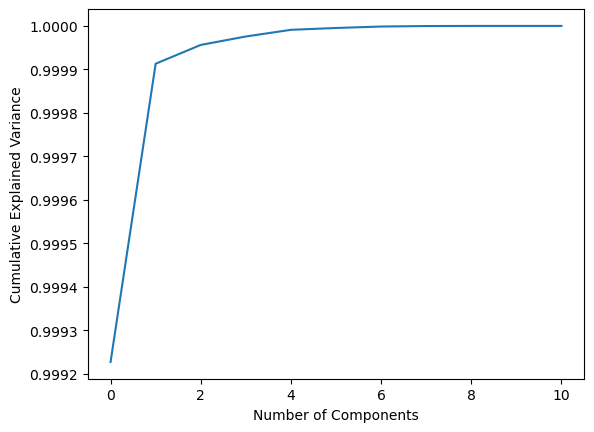

In [18]:
pca = PCA().fit(df2)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.show()

<h3>Linear Discriminant Analysis (LDA)</h3>

In [19]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [23]:
n_components = 2
lda = LinearDiscriminantAnalysis(n_components = n_components)

In [24]:
iris_lda = lda.fit_transform(X, y)

In [25]:
iris_lda

array([[ 8.06179978e+00,  3.00420621e-01],
       [ 7.12868772e+00, -7.86660426e-01],
       [ 7.48982797e+00, -2.65384488e-01],
       [ 6.81320057e+00, -6.70631068e-01],
       [ 8.13230933e+00,  5.14462530e-01],
       [ 7.70194674e+00,  1.46172097e+00],
       [ 7.21261762e+00,  3.55836209e-01],
       [ 7.60529355e+00, -1.16338380e-02],
       [ 6.56055159e+00, -1.01516362e+00],
       [ 7.34305989e+00, -9.47319209e-01],
       [ 8.39738652e+00,  6.47363392e-01],
       [ 7.21929685e+00, -1.09646389e-01],
       [ 7.32679599e+00, -1.07298943e+00],
       [ 7.57247066e+00, -8.05464137e-01],
       [ 9.84984300e+00,  1.58593698e+00],
       [ 9.15823890e+00,  2.73759647e+00],
       [ 8.58243141e+00,  1.83448945e+00],
       [ 7.78075375e+00,  5.84339407e-01],
       [ 8.07835876e+00,  9.68580703e-01],
       [ 8.02097451e+00,  1.14050366e+00],
       [ 7.49680227e+00, -1.88377220e-01],
       [ 7.58648117e+00,  1.20797032e+00],
       [ 8.68104293e+00,  8.77590154e-01],
       [ 6.

<h2>Pipeline</h2>

In [26]:
from sklearn.pipeline import Pipeline
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [27]:
pipeline = Pipeline([
    ("scaler", StandardScaler()),
    ("pca", PCA(n_components = 2)),
    ("lr", LogisticRegression())
])

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

In [29]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('pca', PCA(n_components=2)),
                ('lr', LogisticRegression())])

In [30]:
pipe_pred = pipeline.predict(X_test)

In [31]:
accuracy_score(y_test, pipe_pred)

0.9333333333333333